In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
mm = 1/25.4

In [3]:
planet_csv = 'data/planet_methane.csv'
s2_csv = 'data/s2_methane.csv'

In [4]:
planet_df = pd.read_csv(planet_csv)
s2_df = pd.read_csv(s2_csv)

In [5]:
#fluxes expressed as mg CH4/m2/day
planet_df.head(5)

,Unnamed: 0,AOI,Cell_ID,pl_pond_methane,pl_pond_methane_low,pl_pond_methane_high,pl_lake_methane,area
0,3,birch_creek,12440,0.179813,0.161819,0.221633,2.095121,1253.363633
1,4,birch_creek,13041,0.109888,0.098976,0.146488,0.719908,1228.564071
2,5,birch_creek,12441,0.133748,0.122760,0.141485,2.100259,1253.363632
3,7,YKD,6780,0.844065,0.844065,0.844065,7.430195,1495.463654
4,11,fairbanks,10628,0.102397,0.091789,0.109465,0.216177,1327.145772


In [6]:
s2_df.head(5)

,Unnamed: 0,AOI,Cell_ID,pl_pond_methane,pl_lake_methane,area
0,3,birch_creek,12440,0.133447,2.186571,1253.363633
1,4,birch_creek,13041,0.080138,0.788853,1228.564071
2,5,birch_creek,12441,0.104508,2.170189,1253.363632
3,7,YKD,6780,0.632589,7.369984,1495.463654
4,11,fairbanks,10628,0.040807,0.206974,1327.145772


In [7]:
planet_df['product'] = ['PlanetScope']*len(planet_df)
planet_df['var_high'] = (planet_df['pl_pond_methane_high']-planet_df['pl_pond_methane'])
planet_df['var_low'] = (planet_df['pl_pond_methane']-planet_df['pl_pond_methane_low'])

planet_df['var_frac_high'] = (planet_df['pl_pond_methane_high']/planet_df['pl_lake_methane']-planet_df['pl_pond_methane']/planet_df['pl_lake_methane'])
planet_df['var_frac_low'] = (planet_df['pl_pond_methane']/planet_df['pl_lake_methane']-planet_df['pl_pond_methane_low']/planet_df['pl_lake_methane'])

s2_df['product'] = ['Sentinel-2']*len(s2_df)
s2_df['pl_pond_methane_high'] = np.zeros(len(s2_df))
s2_df['pl_pond_methane_low'] = np.zeros(len(s2_df))
s2_df['var_high'] = np.zeros(len(s2_df))
s2_df['var_low'] = np.zeros(len(s2_df))
s2_df['var_frac_low'] = np.zeros(len(s2_df))
s2_df['var_frac_high'] = np.zeros(len(s2_df))

In [8]:
methane_df = pd.concat([planet_df, s2_df])

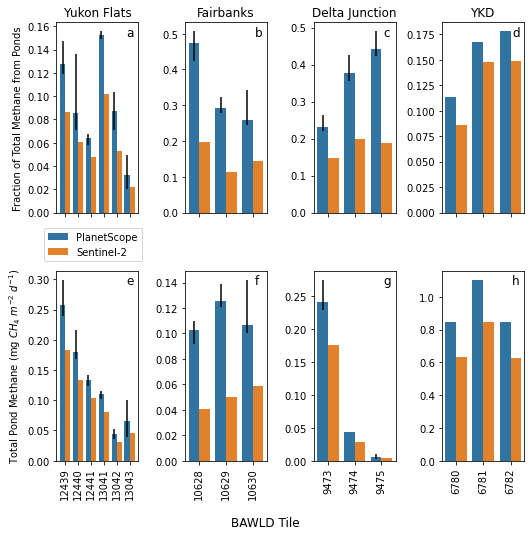

In [9]:
fig, axes = plt.subplots(2,4, figsize = (190*mm,190*mm))

pal = sns.color_palette('gnuplot',8)

sns.barplot(x=methane_df.loc[methane_df['AOI']=='birch_creek']['Cell_ID'], y=methane_df.loc[methane_df['AOI']=='birch_creek']['pl_pond_methane']/methane_df.loc[methane_df['AOI']=='birch_creek']['pl_lake_methane'], hue = methane_df.loc[methane_df['AOI']=='birch_creek']['product'], ax = axes[0,0])
x_coords = [p.get_x() + 0.5 * p.get_width() for p in axes[0,0].patches]
y_coords = [p.get_height() for p in axes[0,0].patches]
axes[0,0].errorbar(x=x_coords, y=y_coords, yerr=[methane_df.loc[methane_df['AOI']=='birch_creek']['var_frac_low'],methane_df.loc[methane_df['AOI']=='birch_creek']['var_frac_high']], fmt="none", c="k")

sns.barplot(x=methane_df.loc[methane_df['AOI']=='fairbanks']['Cell_ID'], y=methane_df.loc[methane_df['AOI']=='fairbanks']['pl_pond_methane']/methane_df.loc[methane_df['AOI']=='fairbanks']['pl_lake_methane'], hue = methane_df.loc[methane_df['AOI']=='fairbanks']['product'], ax = axes[0,1])
x_coords = [p.get_x() + 0.5 * p.get_width() for p in axes[0,1].patches]
y_coords = [p.get_height() for p in axes[0,1].patches]
axes[0,1].errorbar(x=x_coords, y=y_coords, yerr=[methane_df.loc[methane_df['AOI']=='fairbanks']['var_frac_low'],methane_df.loc[methane_df['AOI']=='fairbanks']['var_frac_high']], fmt="none", c="k")

sns.barplot(x=methane_df.loc[methane_df['AOI']=='delta_junction']['Cell_ID'], y=methane_df.loc[methane_df['AOI']=='delta_junction']['pl_pond_methane']/methane_df.loc[methane_df['AOI']=='delta_junction']['pl_lake_methane'], hue = methane_df.loc[methane_df['AOI']=='delta_junction']['product'], ax = axes[0,2])
x_coords = [p.get_x() + 0.5 * p.get_width() for p in axes[0,2].patches]
y_coords = [p.get_height() for p in axes[0,2].patches]
axes[0,2].errorbar(x=x_coords, y=y_coords, yerr=[methane_df.loc[methane_df['AOI']=='delta_junction']['var_frac_low'],methane_df.loc[methane_df['AOI']=='delta_junction']['var_frac_high']], fmt="none", c="k")

sns.barplot(x=methane_df.loc[methane_df['AOI']=='YKD']['Cell_ID'], y=methane_df.loc[methane_df['AOI']=='YKD']['pl_pond_methane']/methane_df.loc[methane_df['AOI']=='YKD']['pl_lake_methane'], hue = methane_df.loc[methane_df['AOI']=='YKD']['product'], ax = axes[0,3])


sns.barplot(x=methane_df.loc[methane_df['AOI']=='birch_creek']['Cell_ID'], y=methane_df.loc[methane_df['AOI']=='birch_creek']['pl_pond_methane'], hue = methane_df.loc[methane_df['AOI']=='birch_creek']['product'], ax = axes[1,0])
x_coords = [p.get_x() + 0.5 * p.get_width() for p in axes[1,0].patches]
y_coords = [p.get_height() for p in axes[1,0].patches]
axes[1,0].errorbar(x=x_coords, y=y_coords, yerr=[methane_df.loc[methane_df['AOI']=='birch_creek']['var_low'],methane_df.loc[methane_df['AOI']=='birch_creek']['var_high']], fmt="none", c="k")

sns.barplot(x=methane_df.loc[methane_df['AOI']=='fairbanks']['Cell_ID'], y=methane_df.loc[methane_df['AOI']=='fairbanks']['pl_pond_methane'], hue = methane_df.loc[methane_df['AOI']=='fairbanks']['product'], ax = axes[1,1])
x_coords = [p.get_x() + 0.5 * p.get_width() for p in axes[1,1].patches]
y_coords = [p.get_height() for p in axes[1,1].patches]
axes[1,1].errorbar(x=x_coords, y=y_coords, yerr=[methane_df.loc[methane_df['AOI']=='fairbanks']['var_low'],methane_df.loc[methane_df['AOI']=='fairbanks']['var_high']], fmt="none", c="k")

sns.barplot(x=methane_df.loc[methane_df['AOI']=='delta_junction']['Cell_ID'], y=methane_df.loc[methane_df['AOI']=='delta_junction']['pl_pond_methane'], hue = methane_df.loc[methane_df['AOI']=='delta_junction']['product'], ax = axes[1,2])
x_coords = [p.get_x() + 0.5 * p.get_width() for p in axes[1,2].patches]
y_coords = [p.get_height() for p in axes[1,2].patches]
axes[1,2].errorbar(x=x_coords, y=y_coords, yerr=[methane_df.loc[methane_df['AOI']=='delta_junction']['var_low'],methane_df.loc[methane_df['AOI']=='delta_junction']['var_high']], fmt="none", c="k")

sns.barplot(x=methane_df.loc[methane_df['AOI']=='YKD']['Cell_ID'], y=methane_df.loc[methane_df['AOI']=='YKD']['pl_pond_methane'], hue = methane_df.loc[methane_df['AOI']=='YKD']['product'], ax = axes[1,3])


axes[0][0].set(title='Yukon Flats', ylabel='Fraction of Total Methane from Ponds', xlabel='', xticklabels=[])
axes[0][1].set(title='Fairbanks', ylabel='', xlabel='', xticklabels=[])
axes[0][2].set(title='Delta Junction', ylabel='', xlabel='', xticklabels=[])
axes[0][3].set(title='YKD', ylabel='', xlabel='', xticklabels=[])

axes[0][0].get_legend().remove()
axes[0][1].get_legend().remove()
axes[0][2].get_legend().remove()
axes[0][3].get_legend().remove()
axes[1][0].legend(bbox_to_anchor=(1.1, 1.25))
axes[1][1].get_legend().remove()
axes[1][2].get_legend().remove()
axes[1][3].get_legend().remove()

axes[1][0].set(title='', ylabel='Total Pond Methane (mg $CH_{4}$ $m^{-2}$ $d^{-1}$)', xlabel='')
axes[1][0].tick_params(axis='x', labelrotation = 90)
axes[1][1].set(title='', ylabel='', xlabel='')
axes[1][1].tick_params(axis='x', labelrotation = 90)
axes[1][2].set(title='', ylabel='', xlabel='')
axes[1][2].tick_params(axis='x', labelrotation = 90)
axes[1][3].set(title='', ylabel='', xlabel='')
axes[1][3].tick_params(axis='x', labelrotation = 90)

axes[0][0].text(0.85, 0.93, 'a', transform=axes[0][0].transAxes, fontsize = 12)
axes[0][1].text(0.85, 0.93, 'b', transform=axes[0][1].transAxes, fontsize = 12)
axes[0][2].text(0.85, 0.93, 'c', transform=axes[0][2].transAxes, fontsize = 12)
axes[0][3].text(0.85, 0.93, 'd', transform=axes[0][3].transAxes, fontsize = 12)
axes[1][0].text(0.85, 0.93, 'e', transform=axes[1][0].transAxes, fontsize = 12)
axes[1][1].text(0.85, 0.93, 'f', transform=axes[1][1].transAxes, fontsize = 12)
axes[1][2].text(0.85, 0.93, 'g', transform=axes[1][2].transAxes, fontsize = 12)
axes[1][3].text(0.85, 0.93, 'h', transform=axes[1][3].transAxes, fontsize = 12)

fig.supxlabel('BAWLD Tile', fontsize=12)
plt.tight_layout()
plt.savefig('output/methane_ponds.jpg', dpi=300, bbox_inches='tight')
plt.show()
